In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv("data/blend/elo-blending/3.695.csv")
df1.head()

,card_id,target
0,C_ID_0ab67a22ab,-2.502326
1,C_ID_130fd0cbdd,-0.284074
2,C_ID_b709037bc5,-0.959266
3,C_ID_d27d835a9f,-0.158309
4,C_ID_2b5e3df5c2,-1.207105


In [4]:
df2 = pd.read_csv("data/blend/elo-blending/3.696.csv")
df2.head()

,card_id,target
0,C_ID_0ab67a22ab,-2.551613
1,C_ID_130fd0cbdd,-0.277674
2,C_ID_b709037bc5,-0.913739
3,C_ID_d27d835a9f,-0.156286
4,C_ID_2b5e3df5c2,-1.221165


In [1]:
import numpy as np # NUMPY
import pandas as p # PANDAS

# DATA VIZUALIZATION LIBRARIES
from matplotlib import pyplot as plt
import seaborn as sns

# METRICS TO MEASURE RMSE
from math import sqrt
from sklearn import metrics

In [4]:
df_base0 = p.read_csv('data/blend/elo-blending/3.695.csv',names=["card_id","target0"], skiprows=[0],header=None)
df_base1 = p.read_csv('data/blend/elo-blending/3.696.csv',names=["card_id","target1"], skiprows=[0],header=None)

df_base2 = p.read_csv('data/blend/elo-blending/3.692.csv',names=["card_id","targe2"], skiprows=[0],header=None)
df_base3 = p.read_csv('data/blend/elo-blending/3.693.csv',names=["card_id","target3"], skiprows=[0],header=None)
df_base4 = p.read_csv('data/blend/elo-blending/3.699992.csv',names=["card_id","target4"], skiprows=[0],header=None)
df_base5 = p.read_csv('data/blend/elo-blending/3_res_mean.csv',names=["card_id","target5"], skiprows=[0],header=None)
df_base6 = p.read_csv('data/blend/elo-blending/4_res_mean.csv',names=["card_id","target6"], skiprows=[0],header=None)
# df_base7 = p.read_csv('data/blend/elo-blending/3.702.csv',names=["card_id","target7"], skiprows=[0],header=None)
# df_base8 = p.read_csv('data/blend/elo-blending/3.703.csv',names=["card_id","target8"], skiprows=[0],header=None)
# df_base9 = p.read_csv('data/blend/elo-blending/3.704.csv',names=["card_id","target9"], skiprows=[0],header=None)
df_base10 = p.read_csv('data/blend/elo-blending/Blending.csv',names=["card_id","target10"], skiprows=[0],header=None)
df_base11 = p.read_csv('data/blend/elo-blending/BlendingRLS.csv',names=["card_id","target11"], skiprows=[0],header=None)
df_base12 = p.read_csv('data/blend/elo-blending/combining_submission.csv',names=["card_id","target12"], skiprows=[0],header=None)

In [5]:
df_base = p.merge(df_base12,df_base0,how='inner',on='card_id')
df_base = p.merge(df_base,df_base1,how='inner',on='card_id')
df_base = p.merge(df_base,df_base2,how='inner',on='card_id')
df_base = p.merge(df_base,df_base3,how='inner',on='card_id')
df_base = p.merge(df_base,df_base4,how='inner',on='card_id')
df_base = p.merge(df_base,df_base5,how='inner',on='card_id')
df_base = p.merge(df_base,df_base6,how='inner',on='card_id')
# df_base = p.merge(df_base,df_base7,how='inner',on='card_id')
# df_base = p.merge(df_base,df_base8,how='inner',on='card_id')
# df_base = p.merge(df_base,df_base9,how='inner',on='card_id')
df_base = p.merge(df_base,df_base10,how='inner',on='card_id')
df_base = p.merge(df_base,df_base11,how='inner',on='card_id')

In [6]:
# ALTERNATIVE WAY - RMSE MATRIX (RMSE to measure how similar are 2 solutions)
M = np.zeros([df_base.iloc[:,1:].shape[1],df_base.iloc[:,1:].shape[1]])
for i in np.arange(M.shape[1]):
    for j in np.arange(M.shape[1]):
        M[i,j] = sqrt(metrics.mean_squared_error(df_base.iloc[:,i+1], df_base.iloc[:,j+1]))

In [7]:
#SOLUTION = MEAN OF COLUMNS
df_base['target'] = df_base.iloc[:,1:].mean(axis=1)
df_base[['card_id','target']].to_csv("Bestoutput_new_blend.csv",index=False)

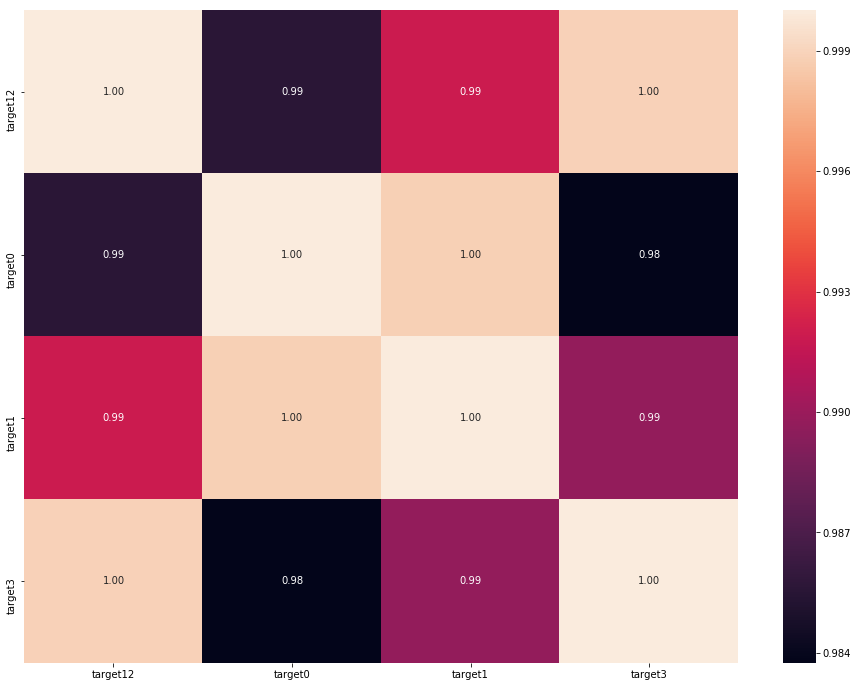

In [22]:
df_base12 = p.read_csv('data/blend/elo-blending/3.695.csv',names=["card_id","target12"], skiprows=[0],header=None)
df_base3 = p.read_csv('data/blend/elo-blending/3.696.csv',names=["card_id","target3"], skiprows=[0],header=None)
df_base0 = p.read_csv('data/blend/elo-blending/3.693.csv',names=["card_id","target0"], skiprows=[0],header=None)
df_base1 = p.read_csv('data/blend/elo-blending/4_res_mean.csv',names=["card_id","target1"], skiprows=[0],header=None)

df_base = p.merge(df_base12,df_base0,how='inner',on='card_id')
df_base = p.merge(df_base,df_base1,how='inner',on='card_id')
df_base = p.merge(df_base, df_base3, how='inner', on='card_id')

#CORRELATION MATRIX (Pearson Correlation to measure how similar are 2 solutions)
plt.figure(figsize=(16,12))
sns.heatmap(df_base.iloc[:,1:].corr(),annot=True,fmt=".2f")

In [23]:
# ALTERNATIVE WAY - RMSE MATRIX (RMSE to measure how similar are 2 solutions)
M = np.zeros([df_base.iloc[:,1:].shape[1],df_base.iloc[:,1:].shape[1]])
for i in np.arange(M.shape[1]):
    for j in np.arange(M.shape[1]):
        M[i,j] = sqrt(metrics.mean_squared_error(df_base.iloc[:,i+1], df_base.iloc[:,j+1]))

In [24]:
#SOLUTION = MEAN OF COLUMNS
df_base['target'] = df_base.iloc[:,1:].mean(axis=1)

In [25]:
df_base[['card_id','target']].to_csv("Bestoutput1.csv",index=False)